<a href="https://colab.research.google.com/github/jamiebbb/jamiebbb.github.io/blob/main/btc_gold_project_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b> Scraping data for use in my project from investing.com </b>

In [ ]:
#Install investpy which allows us to retrieve data from investing.com
!pip install investpy

In [2]:
#Import necessary libraries for use. 
import pandas as pd
import numpy as np
import time 
import os
import investpy as ip

In [3]:
#Specify start and end date for data collection. Using 19th July 2010 since this is the first price for BTC on investing.com when it was $0.1 per BTC :0
start = '19/07/2010'
end = '06/01/2022'

In [19]:
#Download data from investing.com using investpy for BTC and Gold. Decided to use investing.com over yahoo since it has a larger dataset, increasing overall number of observations significantly.  
btc = ip.get_crypto_historical_data(crypto='Bitcoin', from_date=start, to_date=end, order='ascending', interval='Daily')
gold = ip.get_commodity_historical_data(commodity='Gold', from_date=start, to_date=end, order='ascending', interval='Daily')
#spy = ip.get_etf_historical_data(etf='SPDR S&P 500', country='United States', from_date=start, to_date=end, order='ascending', interval='Daily')['Close']

In [20]:
#Join the data frames I formed above into the same one and use a suffix to clearly determine each asset (DataFrame for BTC and Gold)
btc_gold_data = btc.join(gold, lsuffix='BTC', rsuffix='Gold')
btc_gold_data

,OpenBTC,HighBTC,LowBTC,CloseBTC,VolumeBTC,CurrencyBTC,OpenGold,HighGold,LowGold,CloseGold,VolumeGold,CurrencyGold
Date,,,,,,,,,,,,
2010-07-19,0.1,0.1,0.1,0.1,574,USD,1182.20,1182.20,1180.00,1181.70,4.0,USD
2010-07-20,0.1,0.1,0.1,0.1,262,USD,1183.20,1191.60,1181.50,1191.50,8.0,USD
2010-07-21,0.1,0.1,0.1,0.1,575,USD,1190.70,1194.50,1184.10,1191.60,24.0,USD
2010-07-22,0.1,0.1,0.1,0.1,2160,USD,1194.40,1196.00,1194.40,1195.50,79.0,USD
2010-07-23,0.1,0.1,0.1,0.1,2403,USD,1193.70,1198.60,1188.00,1187.70,32.0,USD
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-02,47738.7,47944.9,46718.2,47311.8,27020,USD,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,47293.9,47556.0,45704.0,46430.2,41062,USD,1830.10,1833.00,1798.20,1800.10,168305.0,USD
2022-01-04,46435.7,47505.4,45602.1,45837.3,55589,USD,1801.10,1817.20,1798.10,1814.60,167708.0,USD


In [6]:
#Calculate the mean price values over a weekly time period and save this. Using weekly average prices since Gold doesn't trade on bank holidays or weekends so the dataset is significantly smaller. 
btc_gold_weekly = btc_gold_data.resample('W').mean()
btc_gold_weekly.to_csv('btc_gold_weekly_19-07.2010.csv')

In [135]:
#Drop columns (Open, High, Low and Volume) so we just have close price data for min-max / z-score graphs and save as a csv.
#Using close prices since it is the last traded price of an asset at the end of the trading session. 
btc_gold_weekly.drop(columns=['OpenBTC', 'HighBTC', 'LowBTC', 'VolumeBTC', 'OpenGold', 'HighGold', 'LowGold', 'VolumeGold']).to_csv('btc_gold_weekly_closeprice_09-12-21.csv')

<b> Creating a hypothetical portfolio using the variance of average weekly returns of BTC and Gold. This is out of curiosity and won't actually be used in my project.  </b>

In [21]:
#Creating an annualised covariance matrix for BTC and Gold using the weekly data.
#Calculate and show weekly simple return (percentage)
returns = btc_gold_weekly[{'CloseBTC', 'CloseGold'}].pct_change()
returns

,CloseBTC,CloseGold
Date,,
2010-07-25,NaN,NaN
2010-08-01,0.000000,-0.016224
2010-08-08,0.000000,0.019038
2010-08-15,0.000000,0.010263
2010-08-22,0.000000,0.019538
...,...,...
2021-12-12,-0.091577,0.002092
2021-12-19,-0.041814,0.001908
2021-12-26,0.047895,0.008860


In [22]:
#Create covariance matrix for the returns calculated above
cov_matrix = returns.cov()
cov_matrix

,CloseBTC,CloseGold
CloseBTC,0.020481,0.000105
CloseGold,0.000105,0.000345


In [23]:
#Portfolio fun: [Hypothetical weights added to each asset - in reality should be more heavily weighted to Gold as less volatile (more risk-averse)]
weights = np.array([0.5, 0.5])

#Calculate the portfolio variance. Covariance matrix calculated above...
port_variance = np.dot( weights.T, np.dot(cov_matrix, weights))
port_variance

0.005259140986196366

In [24]:
#Calculate the portfolio standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.07251993509509207

In [25]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 52
portfolioSimpleAnnualReturn

0.8228407789611147

In [26]:
#Show the expected annual return, volatility (risk) and variance
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual reuturn: '+ percent_ret)
print('Annual volatility / risk: ' + percent_vols)
print('Annual variance: ' + percent_var)

Expected annual reuturn: 82.0%
Annual volatility / risk: 7.000000000000001%
Annual variance: 1.0%


In [27]:
#Assigning a variable to the Close price of BTC and Gold so i can calculate the variance in their weekly prices from 2010-2021
data = btc_gold_weekly[{'CloseBTC', 'CloseGold'}]

In [28]:
#Calculate the total number of observations in weekly data
n = len(data)

In [29]:
#Calculate the mean of both BTC and Gold
meanBTC = sum(data['CloseBTC']) / n
meanGold = sum(data['CloseGold']) / n
(meanBTC, meanGold)

(6977.258484378729, 1472.7577061769618)

In [30]:
#Calculate the deviation of each asset from the mean at each weekly interval and then square the result
deviationsBTC = (data['CloseBTC'] - meanBTC) ** 2
deviationsGold = (data['CloseGold'] - meanGold) ** 2

In [31]:
#Calculate the variance of both BTC and Gold
varianceBTC = sum(deviationsBTC) / n
varianceGold = sum(deviationsGold) / n
(varianceBTC, varianceGold)

(185347337.84029263, 45738.398732778805)

In [67]:
#Calculate the standard deviation of each asset
from math import sqrt
sdBTC = sqrt(varianceBTC)
sdGold = sqrt(varianceGold)
(sdBTC, sdGold)

(13614.232914134114, 213.86537525457177)

In [72]:
#Converting the values I calculated above into string variables so i can print them for easier interpretation in my write-up. 
varBTC = str(round(varianceBTC))
sdBTC = str(sdBTC)
varGold = str(round(varianceGold))
sdGold = str(sdGold)

print('Variance of Bitcoin: '+ varBTC)
print('Standard Deviation of Bitcoin: '+ sdBTC)
print('Variance of Gold: '+ varGold)
print('Standard Deviation of Gold: '+ sdGold)

Variance of Bitcoin: 185347338
Standard Deviation of Bitcoin: 13614
Variance of Gold: 45738
Standard Deviation of Gold: 213


<b> Scraping data from yahoo finance, not used in my project since larger dataset available from investing.com </b>

In [ ]:
#Install yahoo finance
!pip install yfinance

In [ ]:
import yfinance as yf

In [ ]:
#Download data from yahoo finance for BTC and Gold using a method inspired by Denes
btc = yf.Ticker("BTC-USD").history(period='10y')
gold = yf.Ticker("GC=F").history(period='10y')

In [ ]:
#The next 8 code blocks were used before i discovered investpy and required me to manually download each dataset from investing.com and save them to my Github repo - far less efficient. 
#Read csv file on Github that I saved from investing.com, index the date to allow resample() function
btc_daily = pd.read_csv('https://raw.githubusercontent.com/jamiebbb/jamiebbb.github.io/main/project_data/btcdaily_24.11.21.csv',
                                      parse_dates=['Date'],
                                      index_col=['Date'],
                                      na_values=['999.99'])
# View first few rows to ensure date properly indexed
btc_daily.head(3)

In [ ]:
#Calculate the mean of values over a weekly time period
btc_weekly = btc_daily.resample('W').mean()

In [ ]:
#Display new dataframe where we now have average weekly values for Price, Open, High and Low
btc_weekly.head(3)

In [ ]:
#Same as BTC but now for Gold
gold_daily = pd.read_csv('https://raw.githubusercontent.com/jamiebbb/jamiebbb.github.io/main/project_data/golddaily_24.11.21.csv',
                                      parse_dates=['Date'],
                                      index_col=['Date'],
                                      na_values=['999.99'])
# View first few rows
gold_daily.head(3)

In [ ]:
#Same code as Bitcoin but for Gold
gold_weekly = gold_daily.resample('W').mean()

In [ ]:
gold_weekly.head(3)

In [ ]:
#Join the datasets into a single dataframe
btc_gold_weeklydata = btc_weekly.join(gold_weekly, rsuffix='Gold', lsuffix='BTC')
btc_gold_weeklydata

In [ ]:
#Drop columns we no longer need (Open, High and Low) and save as a csv
btc_gold_weeklydata.drop(columns=['OpenBTC', 'HighBTC', 'LowBTC','OpenGold', 'HighGold', 'LowGold']).to_csv('btc_gold_price_28-11-21.csv')

<b> Creating visualisations and Seaborn regression. Also, saving min-max and z-score data for use in 2 charts in project. </b>

In [73]:
#Import further libraries that will be used for graphing
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import seaborn as sns
sns.set()

In [74]:
#Import dataset
assets = pd.read_csv('/content/btc_gold_weekly_closeprice_09-12-21.csv')

In [75]:
#Calculate the max, min and range using the weekly average close price of Bitcoin from 2010
btc_max = assets['CloseBTC'].max()
btc_min = assets['CloseBTC'].min()
btc_range = btc_max - btc_min
btc_max, btc_min, btc_range

(65458.985714285714, 0.1, 65458.885714285716)

In [76]:
#Calculate the max, min and range using the weekly average close price of Gold from 2010
gold_max = assets['CloseGold'].max()
gold_min = assets['CloseGold'].min()
gold_range = gold_max - gold_min
gold_max, gold_min, gold_range

(2074.46, 1114.0, 960.46)

In [78]:
#Calculate the max, min and range using the weekly average close price of SPY from 2010 - was used in a previous analysis to see relation of assets to SPY
#spy_max = assets['CloseSPY'].max()
#spy_min = assets['CloseSPY'].min()
#spy_range = spy_max - spy_min
#spy_max, spy_min, spy_range

In [79]:
#Normalise the data for both BTC and Gold (and SPY)
assets['CloseBTC_minmax_norm'] = (assets['CloseBTC'] - btc_min) / btc_range
assets['CloseGold_minmax_norm'] = (assets['CloseGold'] - gold_min) / gold_range
#assets['CloseSPY_minmax_norm'] = (assets['CloseSPY'] - spy_min) / spy_range

In [80]:
#Reassign labels to new min/max normalisation values
btc_max = assets['CloseBTC_minmax_norm'].max()
btc_min = assets['CloseBTC_minmax_norm'].min()
btc_range = btc_max - btc_min
btc_max, btc_min, btc_range

(1.0, 0.0, 1.0)

In [81]:
#Use a loop function to join the dataframes and calculate the minmax_norm values
for x in assets.columns[0:0]:
  x_max = assets[x].max()
  x_min = assets[x].min()
  x_range = x_max-x_min
  assets['Close' + x + '_minmax_norm'] = (assets[x]-x_min)/x_range

In [82]:
#Display the first 2 rows to ensure method is correct
assets.head(2)

,Date,CloseBTC,CloseGold,CloseBTC_minmax_norm,CloseGold_minmax_norm
0,2010-07-25,0.1,1189.6,0.0,0.078712
1,2010-08-01,0.1,1170.3,0.0,0.058618


In [83]:
#Finding the right range of data to use (-2 changes to -3 when including SPY)
assets.columns[-2:]

Index(['CloseBTC_minmax_norm', 'CloseGold_minmax_norm'], dtype='object')

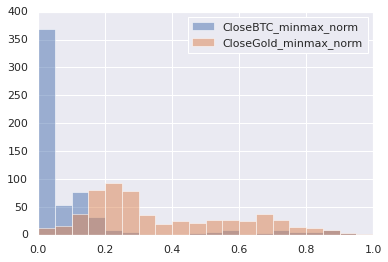

In [85]:
#Calculating the histogram for both assets (-2 changes to -3 when including SPY)
for x in assets.columns[-2:]:
    plt.hist(assets[x], alpha=0.5,bins=20)
    plt.legend(assets.columns[-2:])

In [86]:
#Reset the index so i can utilise date on the x-axis
assets = assets.reset_index()
assets

,index,Date,CloseBTC,CloseGold,CloseBTC_minmax_norm,CloseGold_minmax_norm
0,0,2010-07-25,0.100000,1189.600,0.000000,0.078712
1,1,2010-08-01,0.100000,1170.300,0.000000,0.058618
2,2,2010-08-08,0.100000,1192.580,0.000000,0.081815
3,3,2010-08-15,0.100000,1204.820,0.000000,0.094559
4,4,2010-08-22,0.100000,1228.360,0.000000,0.119068
...,...,...,...,...,...,...
594,594,2021-12-12,49394.357143,1782.240,0.754584,0.695750
595,595,2021-12-19,47328.957143,1785.640,0.723032,0.699290
596,596,2021-12-26,49595.757143,1801.460,0.757661,0.715761
597,597,2022-01-02,47582.528571,1813.640,0.726906,0.728443


In [87]:
#Drop index column
assets.drop(columns='index')

,Date,CloseBTC,CloseGold,CloseBTC_minmax_norm,CloseGold_minmax_norm
0,2010-07-25,0.100000,1189.600,0.000000,0.078712
1,2010-08-01,0.100000,1170.300,0.000000,0.058618
2,2010-08-08,0.100000,1192.580,0.000000,0.081815
3,2010-08-15,0.100000,1204.820,0.000000,0.094559
4,2010-08-22,0.100000,1228.360,0.000000,0.119068
...,...,...,...,...,...
594,2021-12-12,49394.357143,1782.240,0.754584,0.695750
595,2021-12-19,47328.957143,1785.640,0.723032,0.699290
596,2021-12-26,49595.757143,1801.460,0.757661,0.715761
597,2022-01-02,47582.528571,1813.640,0.726906,0.728443


In [136]:
#Create a new dataframe: assets_stack - that shows the weekly date (ensured its in correct format) and the value of each minmax so I can plot on a line chart.
#Also, use the .str.contains() function to find the exact values I need 
assets_stack = assets.set_index('Date').stack().reset_index()
assets_stack.columns = ['Date','Asset','Value']
assets_stack['Date'] = pd.to_datetime(assets_stack['Date'])
assets_stack = assets_stack[assets_stack['Asset'].str.contains('minmax_norm')]
assets_stack.head()

,Date,Asset,Value
3,2010-07-25,CloseBTC_minmax_norm,0.000000
4,2010-07-25,CloseGold_minmax_norm,0.078712
10,2010-08-01,CloseBTC_minmax_norm,0.000000
11,2010-08-01,CloseGold_minmax_norm,0.058618
17,2010-08-08,CloseBTC_minmax_norm,0.000000


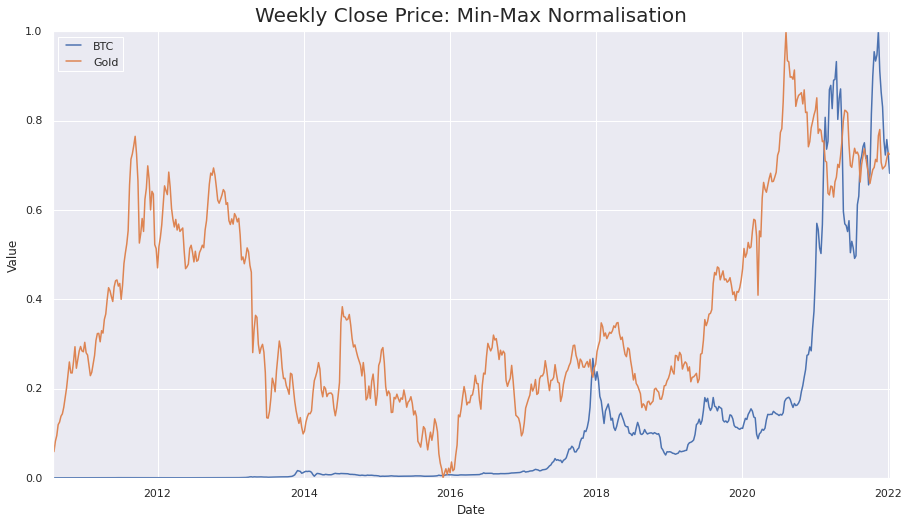

In [137]:
#Create a line chart using seaborn of the above data (assets_stack). Rename the legend labels to represent normalised close prices.
sns.lineplot(x='Date', y='Value', hue='Asset', 
             data=assets_stack,legend=False);
plt.title('Weekly Close Price: Min-Max Normalisation', fontsize=20, pad=10)
plt.legend(labels=['BTC', 'Gold'],loc=2);
sns.set(rc = {'figure.figsize':(15,8)})

In [90]:
#Finding the right range of data to use. (1:4 when including SPY)
assets.columns[2:4]

Index(['CloseBTC', 'CloseGold'], dtype='object')

In [91]:
#Calculate the z-scores for the close price of bitcoin and gold. (1:4 when including SPY)
for x in assets.columns[2:4]:
  assets[x+'_z_norm']= (assets[x] - assets[x].mean())/assets[x].std()

In [92]:
#Append the z-scores to the assets data frame and also create a new stack so I can plot these scores on a unique graph 
assets_stack = assets.set_index('Date').stack().reset_index()
assets_stack.columns = ['Date','Asset','Value']
assets_stack['Date'] = pd.to_datetime(assets_stack['Date'])
assets_stack = assets_stack[assets_stack['Asset'].str.contains('z_norm')]
assets_stack.head()

,Date,Asset,Value
5,2010-07-25,CloseBTC_z_norm,-0.512062
6,2010-07-25,CloseGold_z_norm,-1.322894
12,2010-08-01,CloseBTC_z_norm,-0.512062
13,2010-08-01,CloseGold_z_norm,-1.413062
19,2010-08-08,CloseBTC_z_norm,-0.512062


In [93]:
#Display the entire assets dataframe with the minmax and z-score values on
assets

,index,Date,CloseBTC,CloseGold,CloseBTC_minmax_norm,CloseGold_minmax_norm,CloseBTC_z_norm,CloseGold_z_norm
0,0,2010-07-25,0.100000,1189.600,0.000000,0.078712,-0.512062,-1.322894
1,1,2010-08-01,0.100000,1170.300,0.000000,0.058618,-0.512062,-1.413062
2,2,2010-08-08,0.100000,1192.580,0.000000,0.081815,-0.512062,-1.308972
3,3,2010-08-15,0.100000,1204.820,0.000000,0.094559,-0.512062,-1.251787
4,4,2010-08-22,0.100000,1228.360,0.000000,0.119068,-0.512062,-1.141810
...,...,...,...,...,...,...,...,...
594,594,2021-12-12,49394.357143,1782.240,0.754584,0.695750,3.113042,1.445881
595,595,2021-12-19,47328.957143,1785.640,0.723032,0.699290,2.961460,1.461765
596,596,2021-12-26,49595.757143,1801.460,0.757661,0.715761,3.127823,1.535675
597,597,2022-01-02,47582.528571,1813.640,0.726906,0.728443,2.980070,1.592580


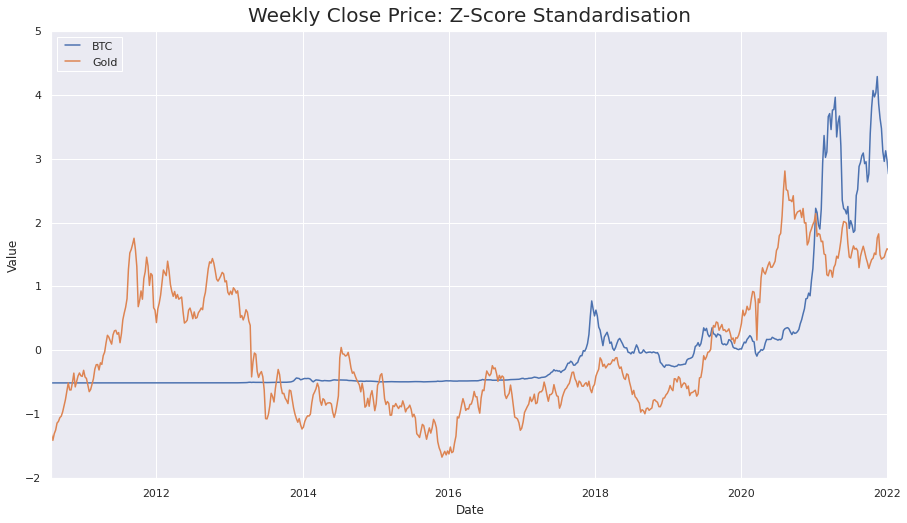

In [98]:
#Create a line chart for the Z-scores of BTC and Gold using the above assets_stack
sns.lineplot(x='Date', y='Value', hue='Asset', 
             data=assets_stack,legend=False);
plt.title('Weekly Close Price: Z-Score Standardisation', pad=10, fontsize=20)
#plt.suptitle('Z-Scores handle outliers more robustly', fontsize=15)
plt.legend(labels=['BTC', 'Gold'], loc=2)
sns.set(rc = {'figure.figsize':(15,8)})

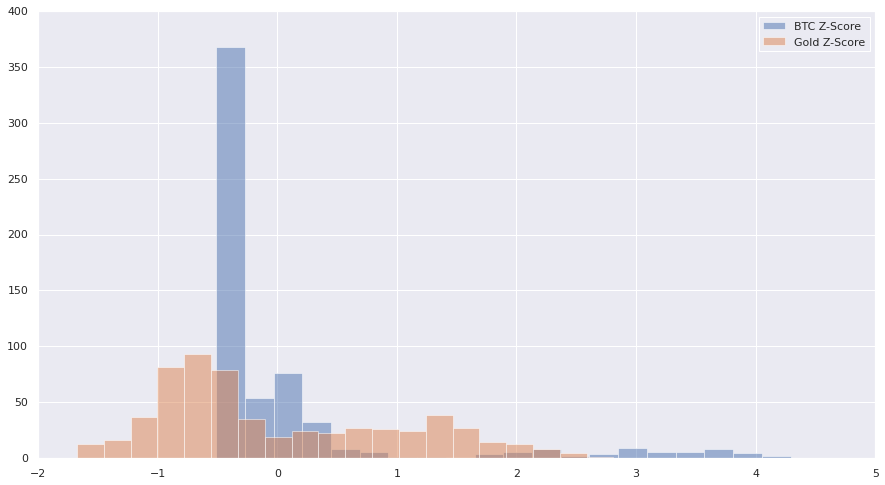

In [99]:
#Create a histogram for the z-scores of btc and gold
for x in assets.columns[-2:]:
    plt.hist(assets[x], alpha=0.5,bins=20)
    plt.legend(labels=['BTC Z-Score', 'Gold Z-Score'])

In [105]:
#Change of plan, decided to export the assets dataframe to a csv so i can manipulate the min-max and z-score graph in Vega as this makes my website look more consistent rather than having 2 .png files.
#Have to drop index column again and then save as csv and export to github manually. 
assets.drop(columns='index').to_csv('assets_scores.csv')

<b> Playing around with different seaborn plots from this point, hence brief comments. Further useful annotated analysis below this section i.e. regressions. </b>


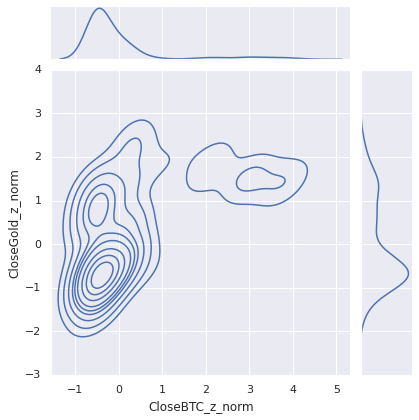

In [108]:
#Kernel density plot of z-score values
sns.jointplot(x="CloseBTC_z_norm", y="CloseGold_z_norm", data=assets, kind='kde');

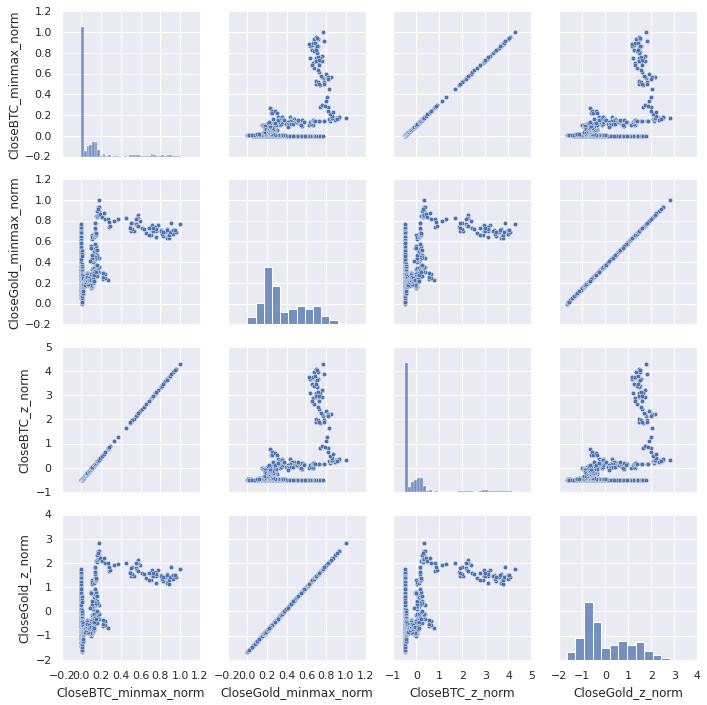

In [115]:
#Trellis pairplot 
sns.pairplot(assets[assets.columns[4:8]], height=2.5);

<b> Regression of BTC on Gold using Seaborn <b>

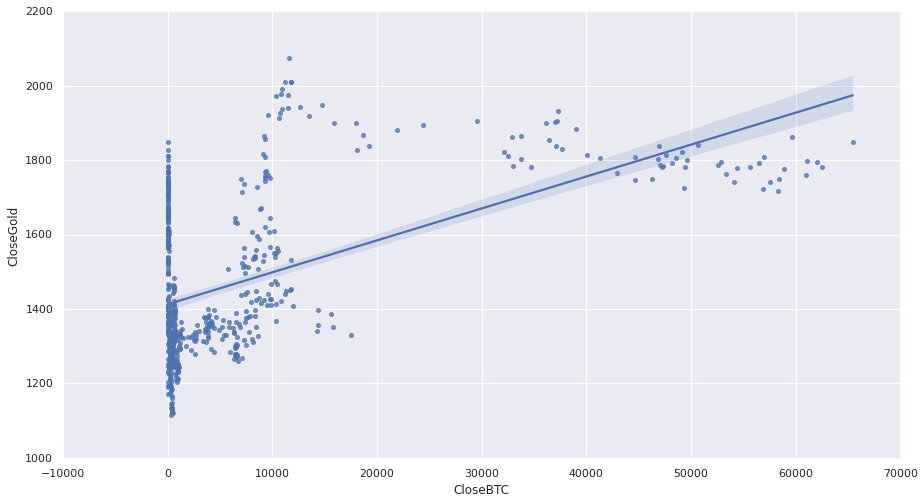

In [116]:
#Regression using assets data. Instead decided to use the btc_gold_weekly_19-07.2010.csv file that i exported and saved on my Github.
#Used this file within Vega to form the regression. This was so i could make the regression interactive and see the correlation over different years. 
sns.regplot(x='CloseBTC',y='CloseGold',data=assets)

<b> Regression of BTC on Gold using weekly data. Also, calculating R^2 and equation of the regression line. Useful to see whether R^2 here matches Vega regression - it should since I'm using the same dataset annnd it does :D </b>

In [117]:
#Import necessary libraries for regressions and regression statistics
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [118]:
#Calculate various statistics that will be useful in the regression of BTC on Gold
slope, intercept, rvalue, pvalue, stderr = linregress(x=assets.dropna()['CloseBTC'], y=assets.dropna()['CloseGold'])

In [119]:
#Denoting the x and y axis as close price for BTC/Gold from the assets dataframe
x = assets['CloseBTC']
y = assets['CloseGold']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


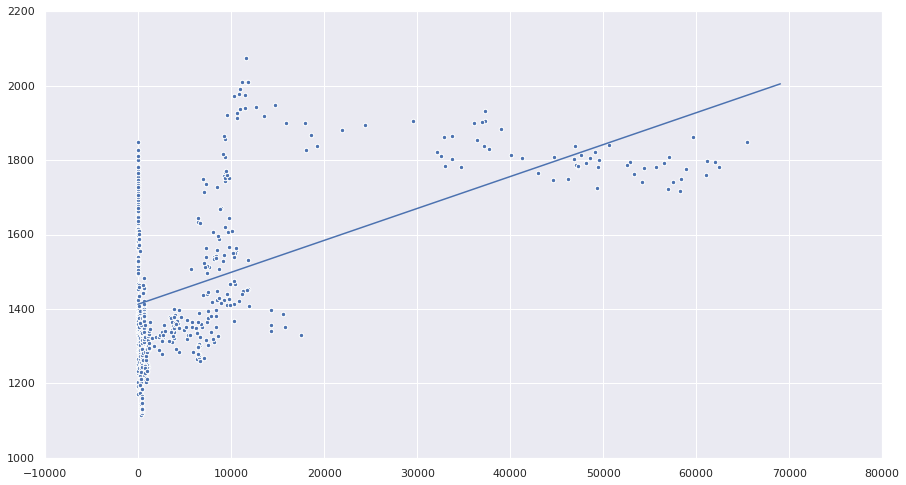

In [124]:
#Creating the linear regression of BTC on Gold, made the end point $69,044 since this is highest value BTC reached which was on November 10th as reported by CoinGecko. 
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 69044)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [125]:
#Display linear equation and the R^2 value
print('y = ',np.round(slope,2),' * x + ',np.round(intercept,2))
print('R² = ',np.round(rvalue**2,2))

y =  0.01  * x +  1412.9
R² =  0.3


In [126]:
#Print model slope and model intercept values
print("Model slope:", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope: 0.00857912105257458
Model intercept: 1412.8989610243734


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':


Text(0, 0.5, 'CloseGold')

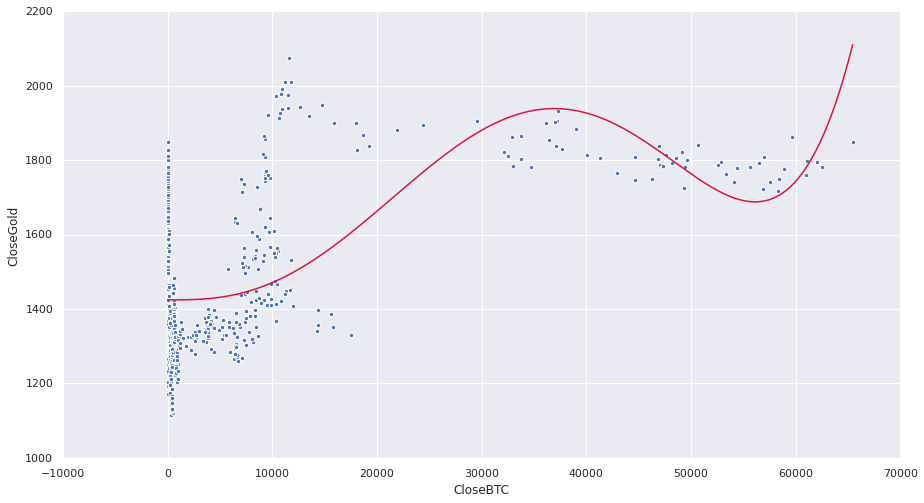

In [127]:
#Creating polynomial regression 
#Denote x-axis as BTC and y-axis as Gold
x = assets.dropna()['CloseBTC']
y = assets.dropna()['CloseGold']

#Create the polynomial model calculating the linear regression with a set number of turning points, 1 - Linear Regression. 
poly_model = make_pipeline(PolynomialFeatures(5),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

#Plot the scatter plot
plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.xlabel('CloseBTC')
plt.ylabel('CloseGold')

<b> Now, for some extra Gaussian fun ✌ </b>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


Text(0, 0.5, 'Gold')

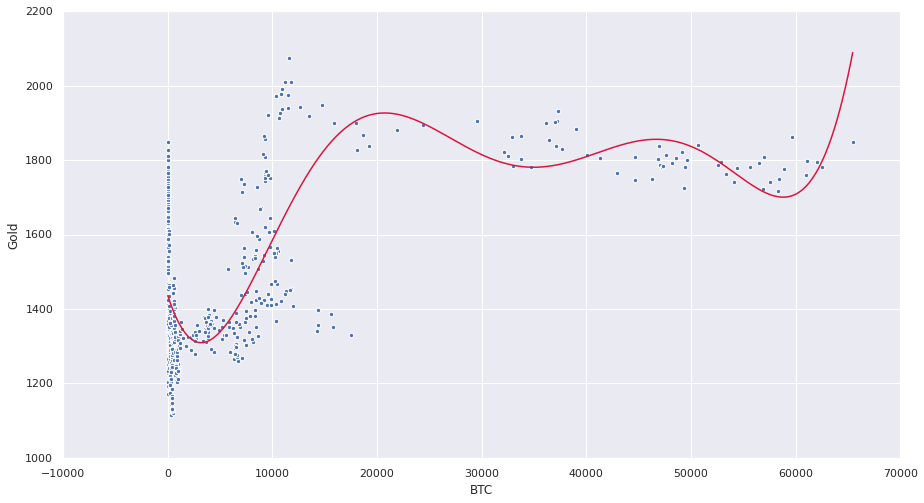

In [130]:
#Import library for Gaussian/polynomial basis functions
from sklearn.base import BaseEstimator, TransformerMixin

#Creating a Gaussian basis function
class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(5),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.xlabel('BTC')
plt.ylabel('Gold')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Gold')

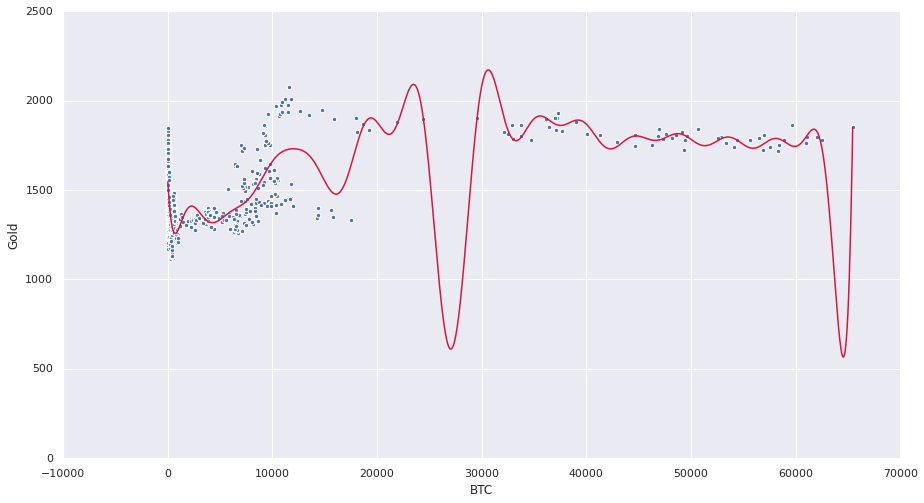

In [131]:
#Gaussian basis functions - choosing too many functions can lead to over-fitting which is clear to see here. 
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.xlabel('BTC')
plt.ylabel('Gold')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


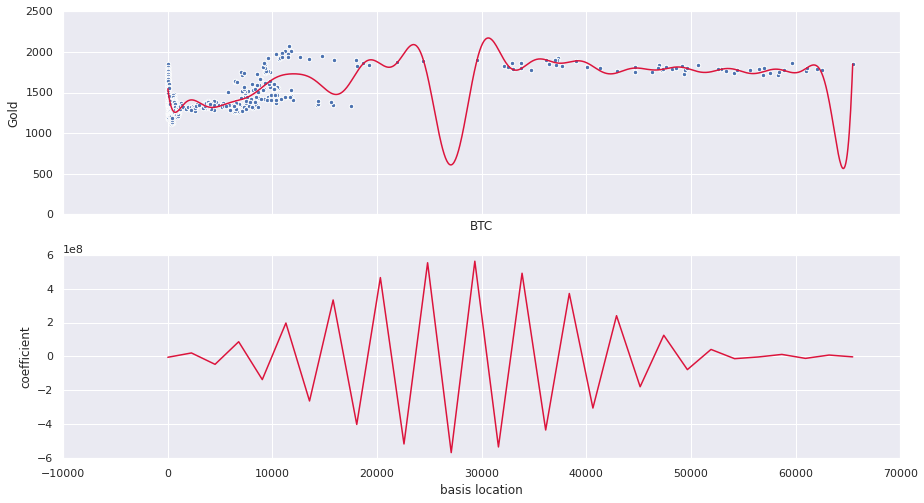

In [132]:
#Coefficients of the Gaussian bases plotted with respect to their locations - displays extremity 
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]),c='crimson')
    ax[0].set(xlabel='BTC', ylabel='Gold')
    
    if title:
        ax[0].set_title(title)
#The lower panel of the figure (code here) shows the amplitude of the basis function at each location 
    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_,c='crimson')
    ax[1].set(xlabel='basis location',
              ylabel='coefficient')
    
model = make_pipeline(GaussianFeatures(30), LinearRegression()) #try changing to 50
basis_plot(model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


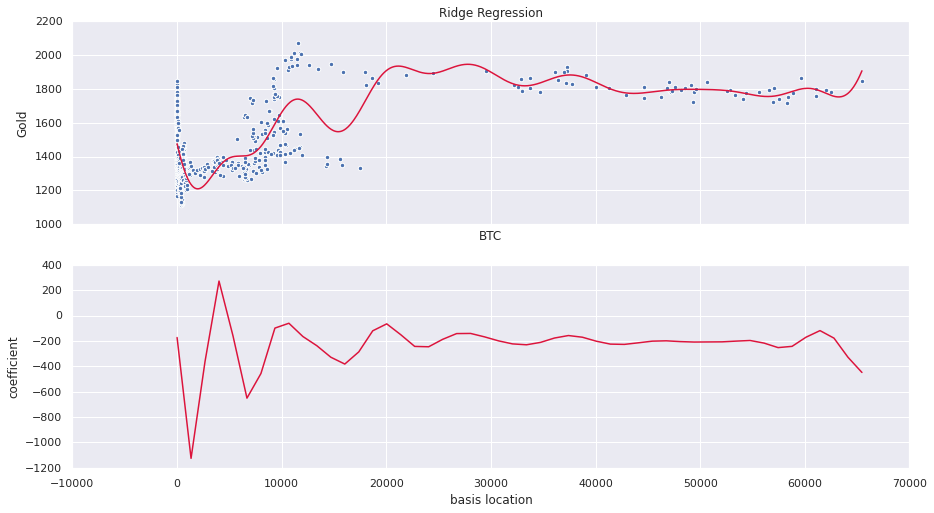

In [133]:
#Creating a ridge regression (L_2 Regularisation) - penalising the sum of squares (2-norms) of the model coefficients 
#Alpha is a free parameter that controls the strength of the penalty
#The alpha parameter is essentially a knob conntrolling the complexity of the resulting model
#As alpha -> 0, we recover the standard linear regression result 
#An advantage of the ridge regression is that it can be computed very efficiently-at hardly more computational cost than the original linear regression model
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(50), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.885e+06, tolerance: 2.740e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


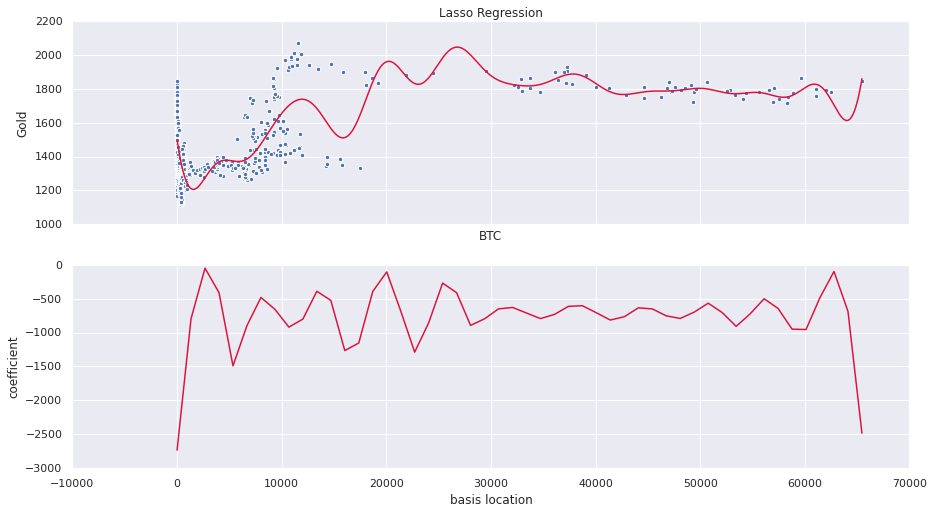

In [134]:
#Creating a Lasso regression (L_1 Regularisation) - penalising the sum of absolute values (1-norms) of regression coefficients 
#Due to geometric reasons lassoo regression tends to favour sparse models where possible:
#It preferentially sets model coefficients to exactly zero 
#With the lasso regression penalty, the majority of the coefficients are exactly zero, with the functional behaviour being modeled by a small subset of the available basis functions. 
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(50), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')